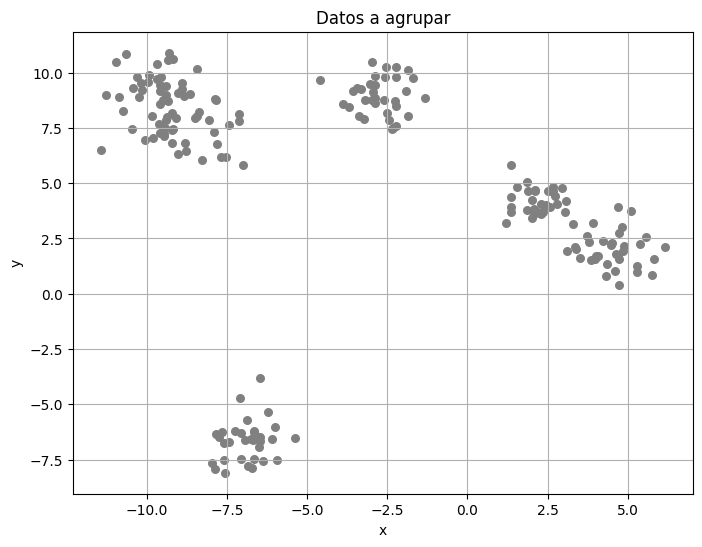

In [9]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

# Crear dataset con 6 centros
X, y = make_blobs(n_samples=200, centers=6, n_features=2, cluster_std=0.80, random_state=42)
df = pd.DataFrame(X, columns=["x", "y"])

# Graficar puntos
plt.figure(figsize=(8, 6))
plt.scatter(df["x"], df["y"], s=30, color='gray')
plt.title("Datos a agrupar")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [10]:
import mlflow
import mlflow.sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

mlflow.set_experiment("kmeans_explanation")

silhouette_scores = []
K_range = range(2, 16)

with mlflow.start_run(run_name="silhouette_analysis") as run:
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
        
        mlflow.log_metric("silhouette", score, step=k)
        mlflow.log_param(f"centroids_k_{k}", k)

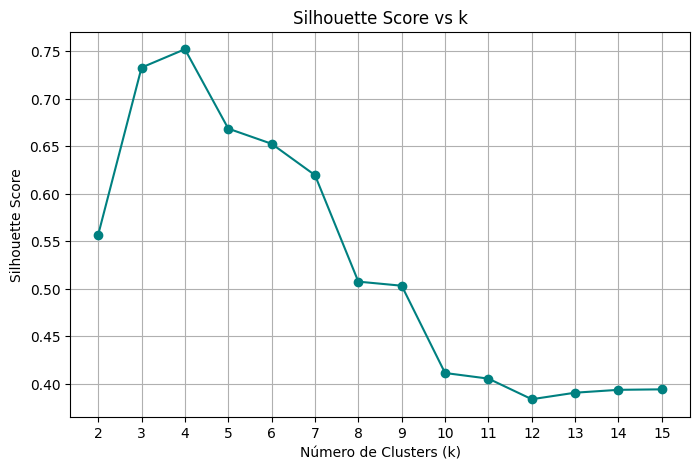

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='teal')
plt.title("Silhouette Score vs k")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [12]:
from matplotlib import cm
import numpy as np

# Colores predefinidos para máximo 6 clusters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

def plot_kmeans_clusters(df, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster = df[labels == i]
        plt.scatter(cluster["x"], cluster["y"], color=colors[i % len(colors)], label=f'Cluster {i+1}')
    
    # Marcar centroides
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=150, marker='X', label='Centroides')
    
    plt.title(f"K-Means con k = {k}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

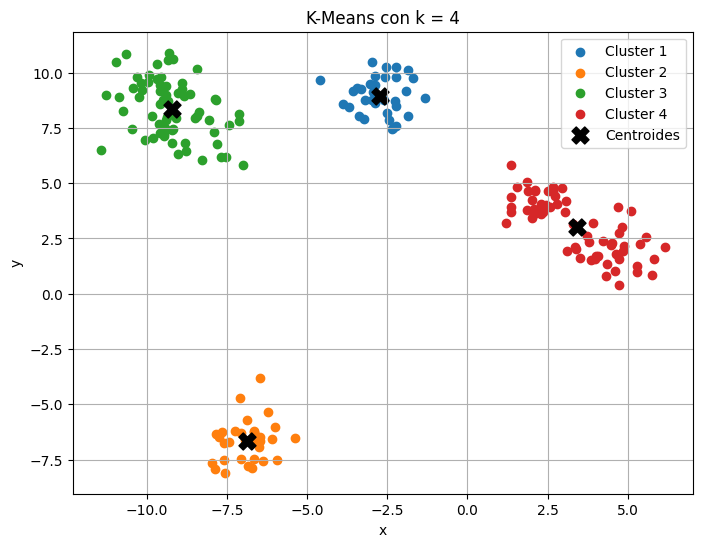

In [15]:
plot_kmeans_clusters(df, 4)